In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path



In [ ]:
# Combine all CSVs
csv_dir = Path("data/output/combined_anomalies")

# Only read files that are non-empty and match the CSV pattern
csv_files = [f for f in csv_dir.glob("part-*.csv") if f.stat().st_size > 0]

# Combine into DataFrame
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True,)


In [5]:
df

,2025-05-12T21:49:00.000+02:00,2025-05-12T21:54:00.000+02:00,317.739990234375,317.61554350891106,0.91314745281983,false,317.9018448030407,317.3061630094593,false.1,2025-05-13T18:32:00.000+02:00,...,339.5055866729736,-1.1523554654098687,340.0370662610514,339.10980873894863,2025-05-15T21:06:00.000+02:00,2025-05-15T21:11:00.000+02:00,341.75940712585447,1.1533620088471614,342.4948150899282,340.9459930155405
0,2025-05-12T21:35:00.000+02:00,2025-05-12T21:40:00.000+02:00,316.359985,316.450017,-0.396947,False,316.794442,316.069425,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-05-14T19:12:00.000+02:00,2025-05-14T19:17:00.000+02:00,346.540588,346.681545,-0.814080,False,347.039270,346.330432,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-12T21:26:00.000+02:00,2025-05-12T21:31:00.000+02:00,316.429993,316.617006,-0.830577,False,317.217252,316.104745,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-05-12T18:46:00.000+02:00,2025-05-12T18:51:00.000+02:00,318.410004,318.366212,0.366499,False,318.636419,318.081989,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-12T17:06:00.000+02:00,2025-05-12T17:11:00.000+02:00,317.890015,317.545242,1.205119,False,318.133772,316.907137,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,2025-05-14T18:33:00.000+02:00,2025-05-14T18:38:00.000+02:00,348.766115,0.828271,349.469187,347.867495
1759,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,2025-05-12T18:47:00.000+02:00,2025-05-12T18:52:00.000+02:00,318.341913,-1.581366,318.636419,318.081989
1760,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,2025-05-13T18:38:00.000+02:00,2025-05-13T18:43:00.000+02:00,322.212740,-1.509790,322.528216,321.971821
1761,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,2025-05-15T17:38:00.000+02:00,2025-05-15T17:43:00.000+02:00,339.705635,-0.064153,340.388255,339.034975


In [7]:
# Try loading just one file
sample_file = csv_files[0]
df_sample = pd.read_csv(sample_file, header=None)
print(df_sample.shape)
print(df_sample.head())

(13, 9)
                               0                              1           2  \
0  2025-05-12T21:49:00.000+02:00  2025-05-12T21:54:00.000+02:00  317.739990   
1  2025-05-12T21:35:00.000+02:00  2025-05-12T21:40:00.000+02:00  316.359985   
2  2025-05-14T19:12:00.000+02:00  2025-05-14T19:17:00.000+02:00  346.540588   
3  2025-05-12T21:26:00.000+02:00  2025-05-12T21:31:00.000+02:00  316.429993   
4  2025-05-12T18:46:00.000+02:00  2025-05-12T18:51:00.000+02:00  318.410004   

            3         4      5           6           7      8  
0  317.615544  0.913147  False  317.901845  317.306163  False  
1  316.450017 -0.396947  False  316.794442  316.069425  False  
2  346.681545 -0.814080  False  347.039270  346.330432  False  
3  316.617006 -0.830577  False  317.217252  316.104745  False  
4  318.366212  0.366499  False  318.636419  318.081989  False  


In [ ]:
from pathlib import Path
import pandas as pd

csv_dir = Path("data/output/combined_anomalies")
csv_files = [f for f in csv_dir.glob("part-*.csv") if f.stat().st_size > 0]

# Read only well-formed files with 9 columns
dfs = []
for f in csv_files:
    try:
        df_chunk = pd.read_csv(f, header=None)
        if df_chunk.shape[1] == 9:
            dfs.append(df_chunk)
    except:
        continue

df = pd.concat(dfs, ignore_index=True)

# Set proper column names
df.columns = [
    'window_start', 'window_end', 'latest_close', 'EWMA', 'z_score',
    'is_z_anomaly', 'upper_band', 'lower_band', 'is_band_anomaly'
]

# Parse datetime
df['window_start'] = pd.to_datetime(df['window_start'])
df['window_end'] = pd.to_datetime(df['window_end'])

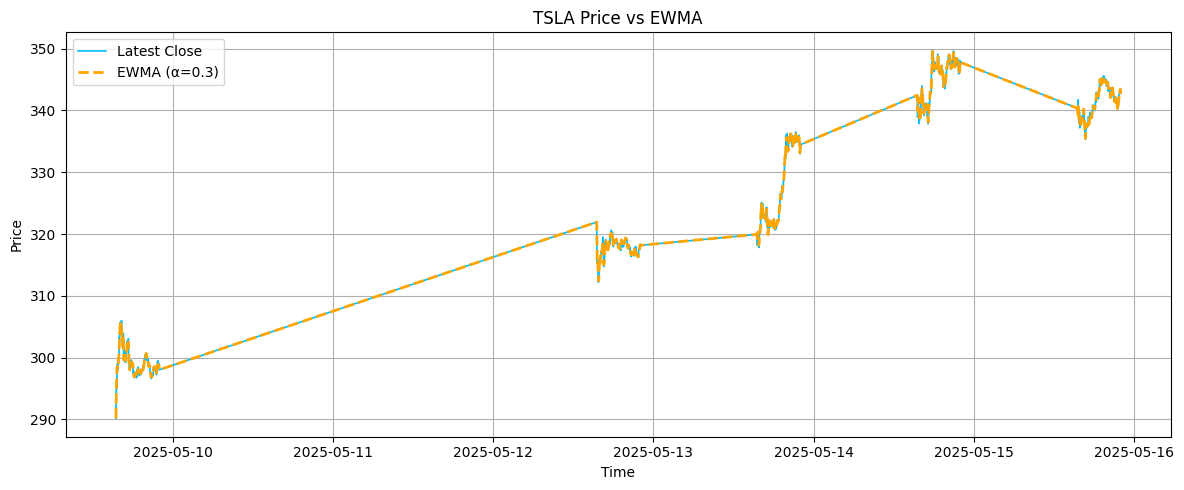

In [13]:
# Plot price vs EWMA
# Clean and plot
df = df.sort_values("window_end")
df = df.drop_duplicates(subset="window_end", keep="last")

plt.figure(figsize=(12, 5))
plt.plot(df['window_end'], df['latest_close'], label='Latest Close', color='deepskyblue', linewidth=1.2)
plt.plot(df['window_end'], df['EWMA'], label='EWMA (α=0.3)', linestyle='--', color='orange', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("TSLA Price vs EWMA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

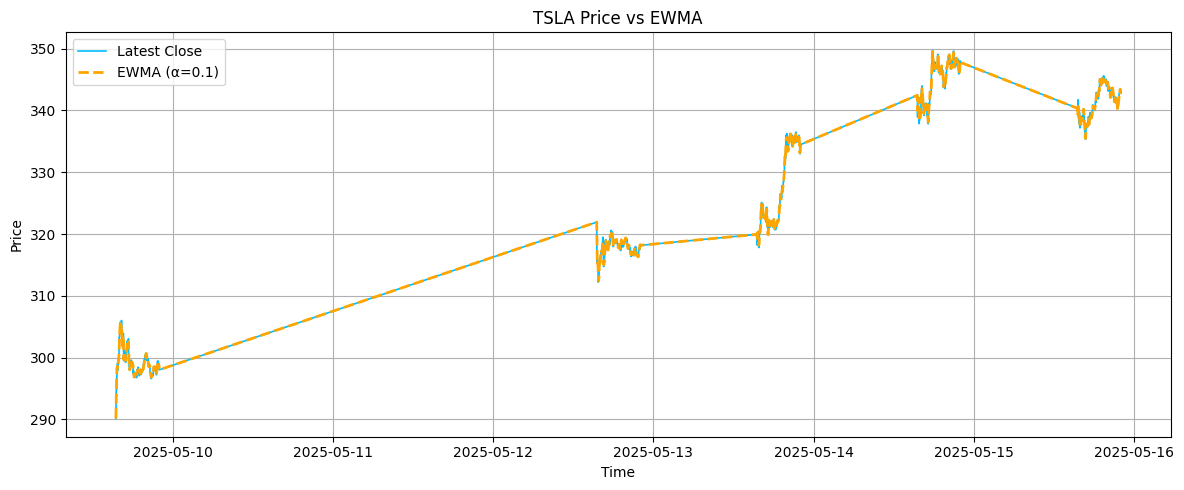

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(df['window_end'], df['latest_close'], label='Latest Close', color='deepskyblue', linewidth=1.2)
plt.plot(df['window_end'], df['EWMA'], label='EWMA (α=0.3)', linestyle='--', color='orange', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("TSLA Price vs EWMA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

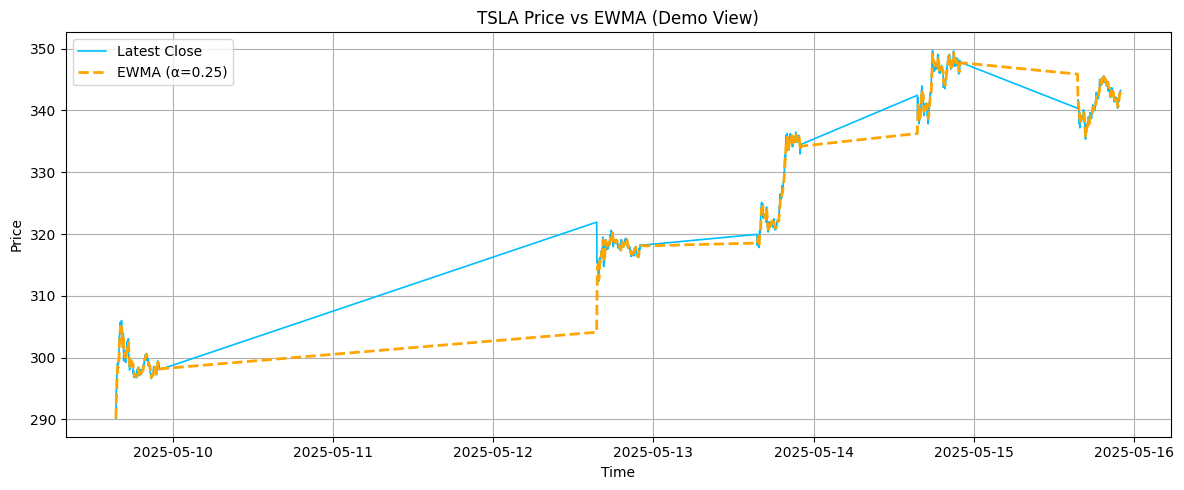

In [17]:
# Recalculate a slower EWMA for demo clarity
df = df.sort_values("window_end")
df = df.drop_duplicates(subset="window_end", keep="last")
df['EWMA_slow'] = df['latest_close'].ewm(alpha=0.25, adjust=False).mean()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df['window_end'], df['latest_close'], label='Latest Close', color='deepskyblue', linewidth=1.2)
plt.plot(df['window_end'], df['EWMA_slow'], label='EWMA (α=0.25)', linestyle='--', color='orange', linewidth=2)

plt.xlabel("Time")
plt.ylabel("Price")
plt.title("TSLA Price vs EWMA (Demo View)")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()